In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 

import datetime
import calendar
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r'Hotel Dataset.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df_raw=df.copy()
df_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [10]:
#filling nan values
nan_replacements = {"children": 0, "country": 0, "agent": 0, "company": 0}
full_data_cln = df.fillna(nan_replacements)
full_data_cln['meal'].replace('Undefined', 'SC', inplace = True)

zero_guest = list(full_data_cln.loc[full_data_cln['adults'] + full_data_cln['children'] + full_data_cln['babies'] == 0].index)
full_data_cln.drop(zero_guest, inplace = True)

# 1. Guests from different countries

In [11]:
#grouping the data by hotel and selecting the confirmed bookings ie excreting the cancelled entries

rh = pd.DataFrame(full_data_cln.loc[(full_data_cln['hotel'] == 'Resort Hotel') & (full_data_cln['is_canceled'] == 0)])
ch = pd.DataFrame(full_data_cln.loc[(full_data_cln['hotel'] == 'City Hotel') & (full_data_cln['is_canceled'] == 0)])
rh.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [12]:
# getting the percentage of guests from each country

country_data = pd.DataFrame(full_data_cln.loc[full_data_cln["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns = {'country': 'guests number'}, inplace = True)
country_data['country'] = country_data.index
country_data['percent'] = country_data['guests number'] / country_data['guests number'].sum()
country_data.head()

,guests number,country,percent
PRT,20977,PRT,0.279652
GBR,9668,GBR,0.128888
FRA,8468,FRA,0.112890
ESP,6383,ESP,0.085094
DEU,6067,DEU,0.080881


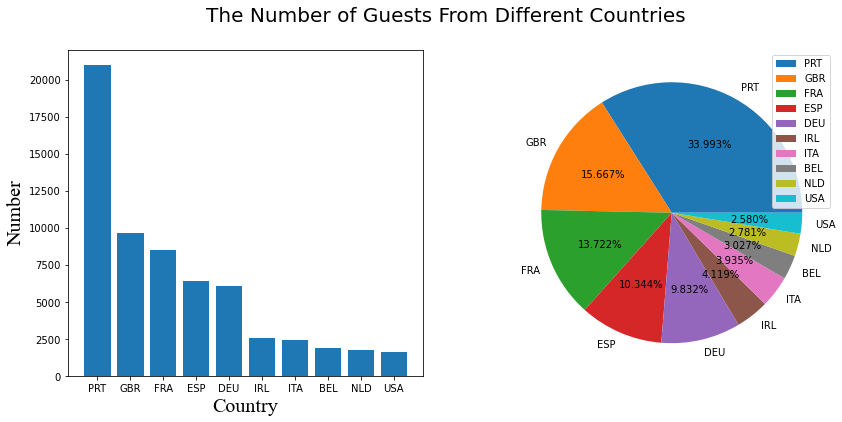

In [16]:
fig = plt.figure(figsize = (14,6))
ax = fig.add_subplot(121)
country_data_plot = country_data.iloc[:10, :]

font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 20}
ax.set_xlabel('Country', font)
ax.set_ylabel('Number', font)
ax.bar(country_data_plot['country'], country_data_plot['guests number'])

ax = fig.add_subplot(122)
country_pie_data = country_data.iloc[:10, :]
ax.pie(x = country_pie_data['guests number'], labels = country_pie_data['country'], autopct = '%.3f%%')

fig.suptitle('The Number of Guests From Different Countries',fontsize = 20)
ax.legend()

## Price per Night according to different year

In [17]:
# average price paid by guest (per person) for each hotel type
rh['adrpp'] = rh['adr'] / (rh['adults'] + rh['children'])
ch['adrpp'] = ch['adr'] / (ch['adults'] + ch['children'])
print("The price per person of Resort hotel is {:.2f}".format(rh['adrpp'].mean()))
print("The price per person of City hotel is {:.2f}".format(ch['adrpp'].mean()))

The price per person of Resort hotel is 47.49
The price per person of City hotel is 59.27


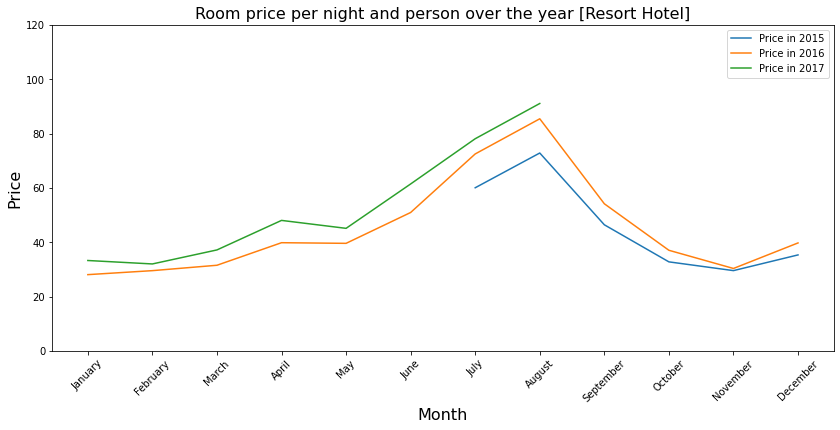

In [19]:
#Resort Hotel

rh_2015 = rh.loc[rh['arrival_date_year'] == 2015][['arrival_date_month', 'adrpp']]
rh_2016 = rh.loc[rh['arrival_date_year'] == 2016][['arrival_date_month', 'adrpp']]
rh_2017 = rh.loc[rh['arrival_date_year'] == 2017][['arrival_date_month', 'adrpp']]

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

rh_2015_plot = pd.DataFrame(columns = {'month', 'adrpp'})
rh_2016_plot = pd.DataFrame(columns = {'month', 'adrpp'})
rh_2017_plot = pd.DataFrame(columns = {'month', 'adrpp'})


for i in range(len(months)):
    adrpp = rh_2015.loc[rh_2015['arrival_date_month'] == months[i]]['adrpp'].mean()
    rh_2015_plot = rh_2015_plot.append(pd.DataFrame({'month': months[i], 'adrpp': adrpp}, index = [i]), ignore_index = True)

for i in range(len(months)):
    adrpp = rh_2016.loc[rh_2016['arrival_date_month'] == months[i]]['adrpp'].mean()
    rh_2016_plot = rh_2016_plot.append(pd.DataFrame({'month': months[i], 'adrpp': adrpp}, index = [i]), ignore_index = True)

for i in range(len(months)):
    adrpp = rh_2017.loc[rh_2017['arrival_date_month'] == months[i]]['adrpp'].mean()
    rh_2017_plot = rh_2017_plot.append(pd.DataFrame({'month': months[i], 'adrpp': adrpp}, index = [i]), ignore_index = True)
    

fig = plt.figure(figsize = (14, 6))
plt.plot(rh_2015_plot['month'], rh_2015_plot['adrpp'], label = 'Price in 2015')
plt.plot(rh_2016_plot['month'], rh_2016_plot['adrpp'], label = 'Price in 2016')
plt.plot(rh_2017_plot['month'], rh_2017_plot['adrpp'], label = 'Price in 2017')
plt.title("Room price per night and person over the year [Resort Hotel]", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price", fontsize=16)
plt.ylim(0, 120)
plt.legend()

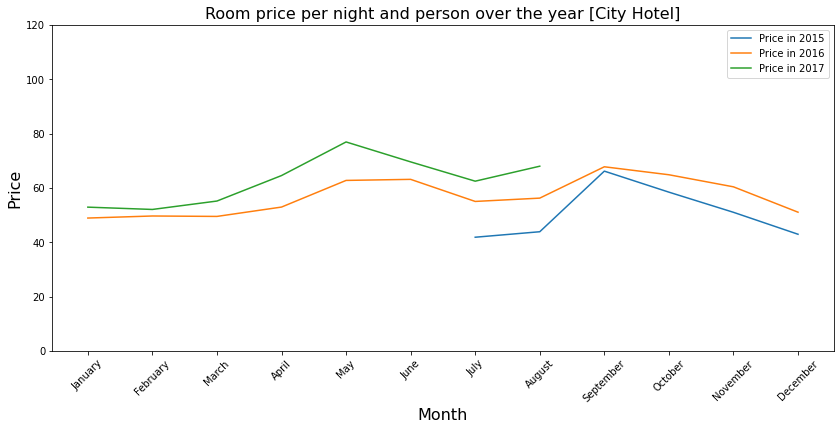

In [20]:
# City Hotel

ch_2015 = ch.loc[ch['arrival_date_year'] == 2015][['arrival_date_month', 'adrpp']]
ch_2016 = ch.loc[ch['arrival_date_year'] == 2016][['arrival_date_month', 'adrpp']]
ch_2017 = ch.loc[ch['arrival_date_year'] == 2017][['arrival_date_month', 'adrpp']]

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

ch_2015_plot = pd.DataFrame(columns = {'month', 'adrpp'})
ch_2016_plot = pd.DataFrame(columns = {'month', 'adrpp'})
ch_2017_plot = pd.DataFrame(columns = {'month', 'adrpp'})


for i in range(len(months)):
    adrpp = ch_2015.loc[ch_2015['arrival_date_month'] == months[i]]['adrpp'].mean()
    ch_2015_plot = ch_2015_plot.append(pd.DataFrame({'month': months[i], 'adrpp': adrpp}, index = [i]), ignore_index = True)

for i in range(len(months)):
    adrpp = ch_2016.loc[ch_2016['arrival_date_month'] == months[i]]['adrpp'].mean()
    ch_2016_plot = ch_2016_plot.append(pd.DataFrame({'month': months[i], 'adrpp': adrpp}, index = [i]), ignore_index = True)

for i in range(len(months)):
    adrpp = ch_2017.loc[ch_2017['arrival_date_month'] == months[i]]['adrpp'].mean()
    ch_2017_plot = ch_2017_plot.append(pd.DataFrame({'month': months[i], 'adrpp': adrpp}, index = [i]), ignore_index = True)
    

fig = plt.figure(figsize = (14, 6))
plt.plot(ch_2015_plot['month'], ch_2015_plot['adrpp'], label = 'Price in 2015')
plt.plot(ch_2016_plot['month'], ch_2016_plot['adrpp'], label = 'Price in 2016')
plt.plot(ch_2017_plot['month'], ch_2017_plot['adrpp'], label = 'Price in 2017')
plt.title("Room price per night and person over the year [City Hotel]", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price", fontsize=16)
plt.ylim(0, 120)
plt.legend()

## Bookings by market segment

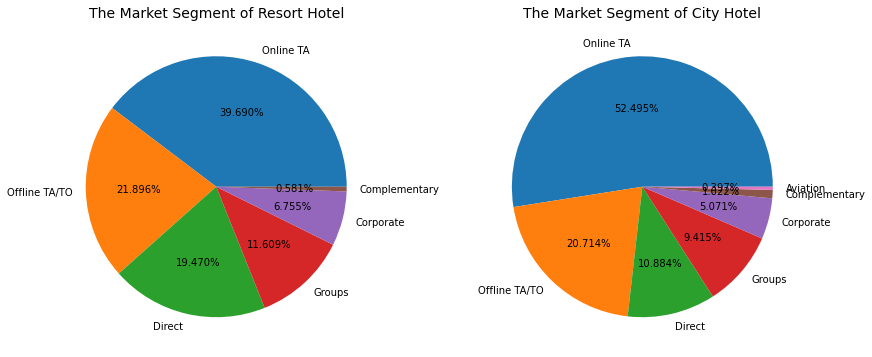

In [21]:
fig = plt.figure(figsize = (14, 6))

ax = fig.add_subplot(121)
rh['market_segment'].value_counts()
rh_segment_pie = pd.DataFrame(rh['market_segment'].value_counts())
ax.set_title('The Market Segment of Resort Hotel', fontsize = 14)
ax = plt.pie(x = rh_segment_pie['market_segment'], labels = rh_segment_pie.index, autopct = '%.3f%%')

ax = fig.add_subplot(122)
ch['market_segment'].value_counts()
ch_segment_pie = pd.DataFrame(ch['market_segment'].value_counts())
ax.set_title('The Market Segment of City Hotel', fontsize = 14)
ax = plt.pie(x = ch_segment_pie['market_segment'], labels = ch_segment_pie.index, autopct = '%.3f%%')

## ADR by Market Segment

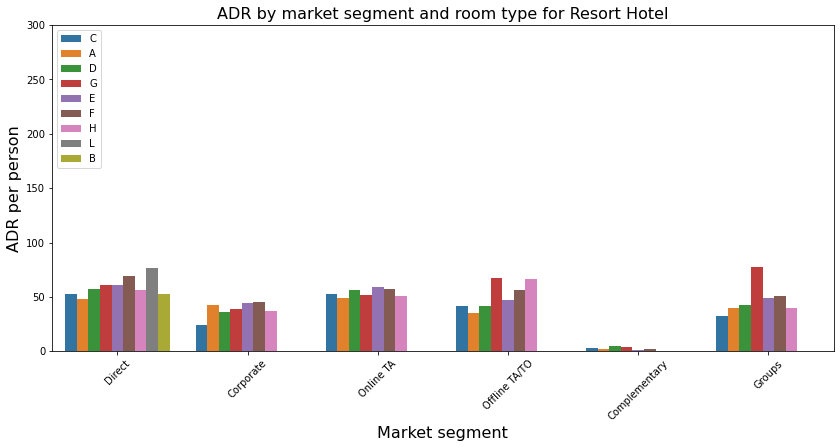

In [24]:
plt.figure(figsize=(14, 6))
sns.barplot(x="market_segment",
            y="adrpp",
            hue = "reserved_room_type",
            data=rh,
            ci="sd",
            errwidth=0,
            capsize=0.1)
plt.title("ADR by market segment and room type for Resort Hotel", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0,300)
plt.ylabel("ADR per person", fontsize=16)
plt.legend()
plt.show()

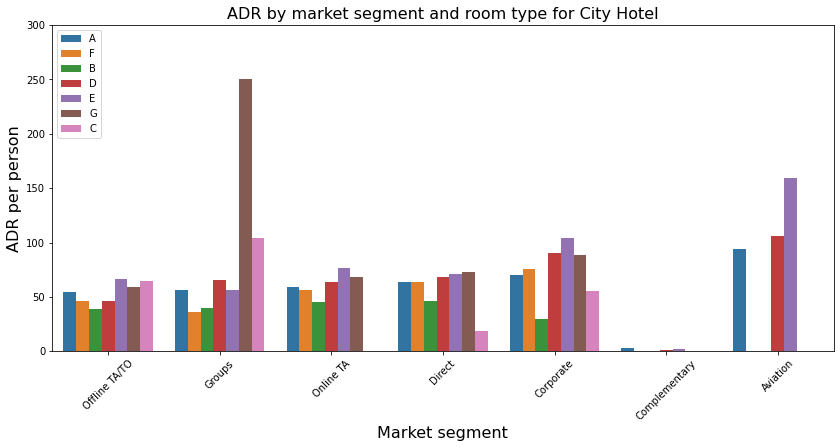

In [25]:
plt.figure(figsize=(14, 6))
sns.barplot(x="market_segment",
            y="adrpp",
            hue="reserved_room_type",
            data=ch,
            ci="sd",
            errwidth=0,
            capsize=0.1)
plt.title("ADR by market segment and room type for City Hotel", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person", fontsize=16)
plt.legend()
plt.ylim(0,300)
plt.show()

## Why price of aviation is high?

In [26]:
aviation = ch.loc[ch['market_segment'] == 'Aviation'][['is_canceled', 'adults', 'children', 'babies', 'lead_time', 'adrpp', 'required_car_parking_spaces']]
aviation.describe()

,is_canceled,adults,children,babies,lead_time,adrpp,required_car_parking_spaces
count,183.0,183.000000,183.0,183.0,183.000000,183.000000,183.000000
mean,0.0,1.016393,0.0,0.0,4.174863,99.640328,0.032787
std,0.0,0.127331,0.0,0.0,4.061616,20.443214,0.178567
min,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,0.0,1.000000,0.0,0.0,1.000000,95.000000,0.000000
50%,0.0,1.000000,0.0,0.0,3.000000,95.000000,0.000000
75%,0.0,1.000000,0.0,0.0,6.000000,110.000000,0.000000
max,0.0,2.000000,0.0,0.0,21.000000,193.500000,1.000000


In [27]:
non_aviation = ch.loc[ch['market_segment'] != 'Aviation'][['is_canceled', 'adults', 'children', 'babies', 'lead_time', 'adrpp', 'required_car_parking_spaces']]
non_aviation.describe()

,is_canceled,adults,children,babies,lead_time,adrpp,required_car_parking_spaces
count,45901.0,45901.000000,45901.000000,45901.000000,45901.000000,45901.000000,45901.000000
mean,0.0,1.837084,0.100608,0.007146,81.160432,59.112050,0.041851
std,0.0,0.525509,0.387422,0.104335,89.947227,27.484709,0.201227
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,0.000000,0.000000,12.000000,42.500000,0.000000
50%,0.0,2.000000,0.000000,0.000000,50.000000,53.965000,0.000000
75%,0.0,2.000000,0.000000,0.000000,122.000000,69.500000,0.000000
max,0.0,4.000000,3.000000,10.000000,518.000000,510.000000,3.000000


## Most busy months for both the hotels

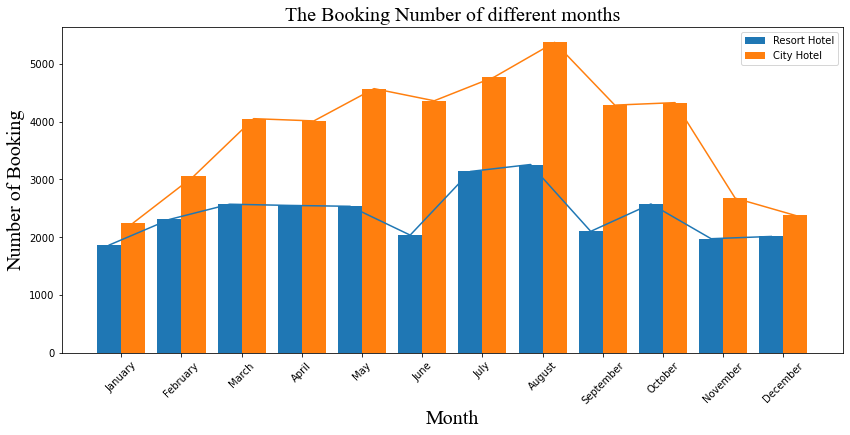

In [29]:
rh_month_guests = pd.DataFrame(rh['arrival_date_month'].value_counts())
ch_month_guests = pd.DataFrame(ch['arrival_date_month'].value_counts())
rh_month_guests = rh_month_guests.loc[months]
ch_month_guests = ch_month_guests.loc[months]


fig = plt.figure(figsize = (14, 6))

x = list(range(len(months)))
x_rh = [i-0.2 for i in list(range(len(months)))]
x_ch = [i+0.2 for i in list(range(len(months)))]

plt.bar(x_rh, rh_month_guests['arrival_date_month'], width = 0.4, label = 'Resort Hotel')
plt.bar(x_ch, ch_month_guests['arrival_date_month'], width = 0.4, label = 'City Hotel')
plt.plot(x_rh, rh_month_guests)
plt.plot(x_ch, ch_month_guests)
plt.ylabel('Number of Booking', font)
plt.xlabel('Month', font)
plt.xticks(x, months, rotation=45)
plt.title('The Booking Number of different months', font)
plt.legend()